#### Import Library

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### Import df and preprocess

In [8]:
data = pd.read_csv('EuropeBikeSales.csv')
data = data[['Date', 'Revenue']]

# Group by Date và tính tổng Revenue
grouped_df = data.groupby('Date').sum().reset_index()

# Chuyển đổi cột 'Date' thành kiểu datetime với định dạng 'dd/mm/yyyy'
grouped_df['Date'] = pd.to_datetime(grouped_df['Date'], format='%d/%m/%Y')

# Sắp xếp dfFrame theo cột 'Date'
df_sorted = grouped_df.sort_values(by='Date')

# In ra kết quả
print(df_sorted)

grouped_df.set_index('Date', inplace=True)

data = grouped_df.sort_index()

# drop index
data.reset_index(inplace=True)

           Date  Revenue
0    2011-01-01    12821
682  2011-01-02    11868
1358 2011-01-03    31175
1512 2011-01-04    18909
1574 2011-01-05     4675
...         ...      ...
1231 2016-07-27    14094
1293 2016-07-28    19102
1349 2016-07-29    19329
1467 2016-07-30    14761
1507 2016-07-31    25570

[1884 rows x 2 columns]


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1884 non-null   datetime64[ns]
 1   Revenue  1884 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 29.6 KB


### Bieu do du lieu

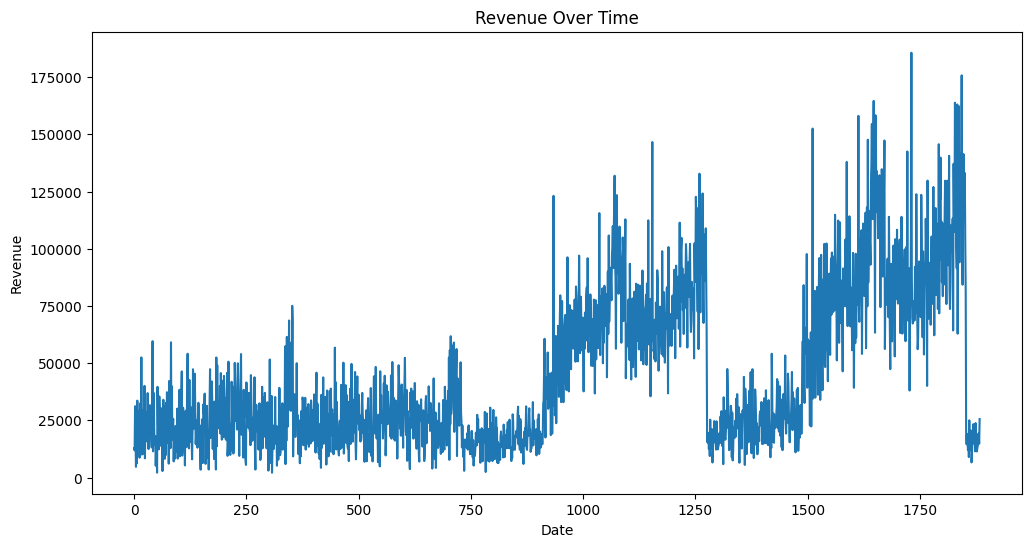

In [10]:
# Assuming you have a DataFrame 'df' with a 'Revenue' column
plt.figure(figsize=(12, 6))
plt.plot(data['Revenue'])
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

#### Model LinearRegression

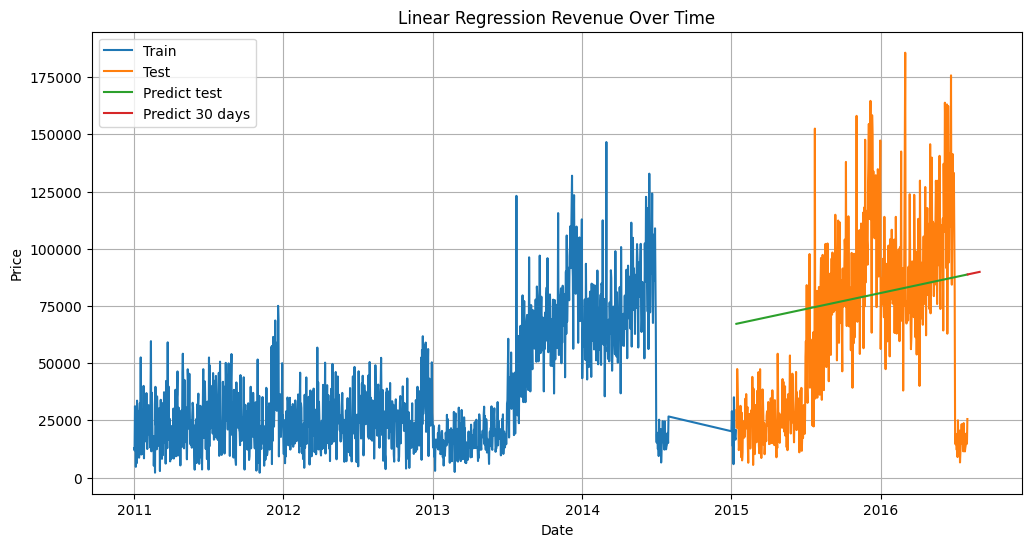

In [12]:
train_data = data[:round(len(data)*70/100)]
test_data = data[round(len(data)*70/100):]

x = data['Date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = data['Revenue'].values

train_size = round(len(x) * 0.7)
X_train, X_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))

plt.plot(train_data['Date'], train_data['Revenue'], label='Train')
plt.plot(test_data['Date'], test_data['Revenue'], label='Test')
plt.plot(test_data['Date'], y_test_pred, label='Predict test')

# Predict prices for the next 30 days
last_date = data['Date'].iloc[-1]
next_30_days = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
x_next_30_days = np.array([d.timestamp() for d in next_30_days]).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)

plt.plot(next_30_days, y_next_30_days, label='Predict 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression Revenue Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_test_pred - y_test)**2))
print('RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print("MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_test_pred - y_test))
print("MAE:", test_mae)

RMSE: 38056.895155362334
MAPE: 114.41110108849757
MAE: 31424.336030175644
